In [1]:
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler,MinMaxScaler,OrdinalEncoder, LabelEncoder
    from sklearn.feature_selection import mutual_info_classif
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
    from xgboost import XGBClassifier
    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
    

In [2]:
adult = pd.read_csv('adult.data', header=None, na_values=' ?')
adult.columns=['age', 'workclass','fnlwgt','education' ,'education-num','marital-status','occupation' ,'relationship' ,'race' ,'sex' ,'capital-gain','capital-loss','hours-per-week','native-country', 'Income']

In [3]:
adult

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [6]:
adult.shape

(32561, 15)

In [7]:
adult.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
adult.workclass.fillna("no_info", inplace = True)
adult.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
no_info               1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
adult.occupation.fillna("Unemployed", inplace = True)

In [10]:
adult["native-country"].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [11]:
adult[adult["native-country"].isnull()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,no_info,293936,7th-8th,4,Married-spouse-absent,Unemployed,Not-in-family,White,Male,0,0,40,NaN,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,NaN,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,NaN,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,NaN,>50K


In [12]:
adult["native-country"].fillna("other", inplace = True)

In [13]:
adult.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [14]:
# Replace the - by _ in all columns
adult.columns = list(map(lambda x : x.replace('-','_',), adult.columns))

In [15]:
adult.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
adult.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'no_info', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
adult.workclass = adult.workclass.apply(lambda x : x.replace("-","_"))

In [18]:
adult.workclass.unique()

array([' State_gov', ' Self_emp_not_inc', ' Private', ' Federal_gov',
       ' Local_gov', 'no_info', ' Self_emp_inc', ' Without_pay',
       ' Never_worked'], dtype=object)

In [19]:
# Convert the target variable to numerical
adult.Income.value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

In [20]:
adult.Income.value_counts() / len(adult)


 <=50K    0.75919
 >50K     0.24081
Name: Income, dtype: float64

In [21]:
adult[adult.Income == ' <=50K']

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Income
0,39,State_gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self_emp_not_inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [22]:
adult.Income = adult.Income.apply(lambda x : 0 if x ==' <=50K' else 1)

In [23]:
adult.Income.value_counts()

0    24720
1     7841
Name: Income, dtype: int64

In [24]:
adult.age.max()

90

In [25]:
adult.age.min()

17

In [26]:
adult = pd.get_dummies(data = adult, columns = ["workclass"] , drop_first = True)

In [27]:
adult.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country,Income,workclass_ Local_gov,workclass_ Never_worked,workclass_ Private,workclass_ Self_emp_inc,workclass_ Self_emp_not_inc,workclass_ State_gov,workclass_ Without_pay,workclass_no_info
0,39,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,0,0,0,0,0,0,1,0,0
1,50,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,0,0,0,0,0,1,0,0,0
2,38,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,United-States,0,0,0,1,0,0,0,0,0
3,53,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,United-States,0,0,0,1,0,0,0,0,0
4,28,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,Cuba,0,0,0,1,0,0,0,0,0


In [28]:
adult.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [29]:
val = [[' Preschool',1] ,[' 1st-4th' ,2],[ ' 5th-6th' ,3] , [' 7th-8th' ,4] ,[ ' 9th',5] , [' 10th',6] ,[' 11th' ,7],[ ' 12th',8],[ ' Some-college',9] , [' Bachelors',10],[' HS-grad' ,11] ,[ ' Masters',12] ,[ ' Doctorate' ,13] , [' Prof-school' ,14] ,[' Assoc-acdm',15], [' Assoc-voc' ,16]]

In [30]:
ord_enc=OrdinalEncoder()

In [31]:
adult.education = ord_enc.fit_transform(np.array(adult.education).reshape(-1,1))

In [32]:
adult.head()

,age,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,...,native_country,Income,workclass_ Local_gov,workclass_ Never_worked,workclass_ Private,workclass_ Self_emp_inc,workclass_ Self_emp_not_inc,workclass_ State_gov,workclass_ Without_pay,workclass_no_info
0,39,77516,9.0,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,United-States,0,0,0,0,0,0,1,0,0
1,50,83311,9.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,United-States,0,0,0,0,0,1,0,0,0
2,38,215646,11.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,United-States,0,0,0,1,0,0,0,0,0
3,53,234721,1.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,United-States,0,0,0,1,0,0,0,0,0
4,28,338409,9.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,...,Cuba,0,0,0,1,0,0,0,0,0


In [33]:
adult.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [34]:
# Remove the space from each value of categorical column
adult["marital_status"]= adult["marital_status"].apply(lambda x: x.replace(" ",""))

In [35]:
adult.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [36]:
adult.marital_status = adult.marital_status.str.replace("-","_")

In [37]:
adult.marital_status.unique()

array(['Never_married', 'Married_civ_spouse', 'Divorced',
       'Married_spouse_absent', 'Separated', 'Married_AF_spouse',
       'Widowed'], dtype=object)

In [38]:
adult = pd.get_dummies(data = adult , columns = ["marital_status"],  drop_first=True)

In [39]:
adult

,age,fnlwgt,education,education_num,occupation,relationship,race,sex,capital_gain,capital_loss,...,workclass_ Self_emp_not_inc,workclass_ State_gov,workclass_ Without_pay,workclass_no_info,marital_status_Married_AF_spouse,marital_status_Married_civ_spouse,marital_status_Married_spouse_absent,marital_status_Never_married,marital_status_Separated,marital_status_Widowed
0,39,77516,9.0,13,Adm-clerical,Not-in-family,White,Male,2174,0,...,0,1,0,0,0,0,0,1,0,0
1,50,83311,9.0,13,Exec-managerial,Husband,White,Male,0,0,...,1,0,0,0,0,1,0,0,0,0
2,38,215646,11.0,9,Handlers-cleaners,Not-in-family,White,Male,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,234721,1.0,7,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
4,28,338409,9.0,13,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,7.0,12,Tech-support,Wife,White,Female,0,0,...,0,0,0,0,0,1,0,0,0,0
32557,40,154374,11.0,9,Machine-op-inspct,Husband,White,Male,0,0,...,0,0,0,0,0,1,0,0,0,0
32558,58,151910,11.0,9,Adm-clerical,Unmarried,White,Female,0,0,...,0,0,0,0,0,0,0,0,0,1
32559,22,201490,11.0,9,Adm-clerical,Own-child,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
adult.occupation = ord_enc.fit_transform(np.array(adult.occupation).reshape(-1,1))

In [41]:
adult.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [42]:
le = LabelEncoder()
adult.relationship = le.fit_transform(np.array(adult.relationship).reshape(-1,1))
adult.race = le.fit_transform(np.array(adult.race).reshape(-1,1))

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
adult.race = le.fit_transform(np.array(adult.race).reshape(-1,1))

In [44]:
adult.race.unique()

array([4, 2, 1, 0, 3], dtype=int64)

In [45]:
adult = pd.get_dummies(adult , columns=['sex'], drop_first=True)

In [46]:
adult.head()

,age,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,...,workclass_ State_gov,workclass_ Without_pay,workclass_no_info,marital_status_Married_AF_spouse,marital_status_Married_civ_spouse,marital_status_Married_spouse_absent,marital_status_Never_married,marital_status_Separated,marital_status_Widowed,sex_ Male
0,39,77516,9.0,13,0.0,1,4,2174,0,40,...,1,0,0,0,0,0,1,0,0,1
1,50,83311,9.0,13,3.0,0,4,0,0,13,...,0,0,0,0,1,0,0,0,0,1
2,38,215646,11.0,9,5.0,1,4,0,0,40,...,0,0,0,0,0,0,0,0,0,1
3,53,234721,1.0,7,5.0,0,2,0,0,40,...,0,0,0,0,1,0,0,0,0,1
4,28,338409,9.0,13,9.0,5,2,0,0,40,...,0,0,0,0,1,0,0,0,0,0


In [47]:
adult.native_country.unique()
adult.native_country = le.fit_transform(np.ravel(adult.native_country))

In [48]:
adult.native_country.value_counts()

38    29170
25      643
41      583
29      198
10      137
1       121
32      114
7       106
18      100
4        95
8        90
22       81
34       80
2        75
21       73
5        70
39       67
12       64
23       62
30       60
3        59
35       51
13       44
19       43
31       37
26       34
28       31
9        29
11       29
6        28
20       24
16       20
0        19
37       19
24       18
36       18
40       16
27       14
15       13
17       13
33       12
14        1
Name: native_country, dtype: int64

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

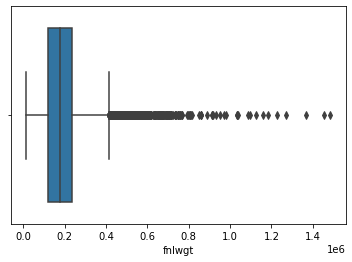

In [49]:
sns.boxplot(adult.fnlwgt)

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='capital_gain'>

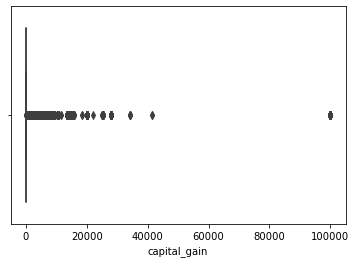

In [50]:
sns.boxplot(adult.capital_gain)

In [51]:
min_trans = MinMaxScaler(feature_range=(0,100))


In [52]:
for col in ["fnlwgt","capital_gain"]:
    adult[col] = min_trans.fit_transform(np.array(adult[col]).reshape(-1,1))

In [53]:
adult

,age,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,...,workclass_ State_gov,workclass_ Without_pay,workclass_no_info,marital_status_Married_AF_spouse,marital_status_Married_civ_spouse,marital_status_Married_spouse_absent,marital_status_Never_married,marital_status_Separated,marital_status_Widowed,sex_ Male
0,39,4.430190,9.0,13,0.0,1,4,2.174022,0,40,...,1,0,0,0,0,0,1,0,0,1
1,50,4.823760,9.0,13,3.0,0,4,0.000000,0,13,...,0,0,0,0,1,0,0,0,0,1
2,38,13.811345,11.0,9,5.0,1,4,0.000000,0,40,...,0,0,0,0,0,0,0,0,0,1
3,53,15.106831,1.0,7,5.0,0,2,0.000000,0,40,...,0,0,0,0,1,0,0,0,0,1
4,28,22.148843,9.0,13,9.0,5,2,0.000000,0,40,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,16.640429,7.0,12,12.0,5,4,0.000000,0,38,...,0,0,0,0,1,0,0,0,0,0
32557,40,9.650032,11.0,9,6.0,0,4,0.000000,0,40,...,0,0,0,0,1,0,0,0,0,1
32558,58,9.482688,11.0,9,0.0,4,4,0.000000,0,40,...,0,0,0,0,0,0,0,0,1,0
32559,22,12.849934,11.0,9,0.0,3,4,0.000000,0,20,...,0,0,0,0,0,0,1,0,0,1


<AxesSubplot:>

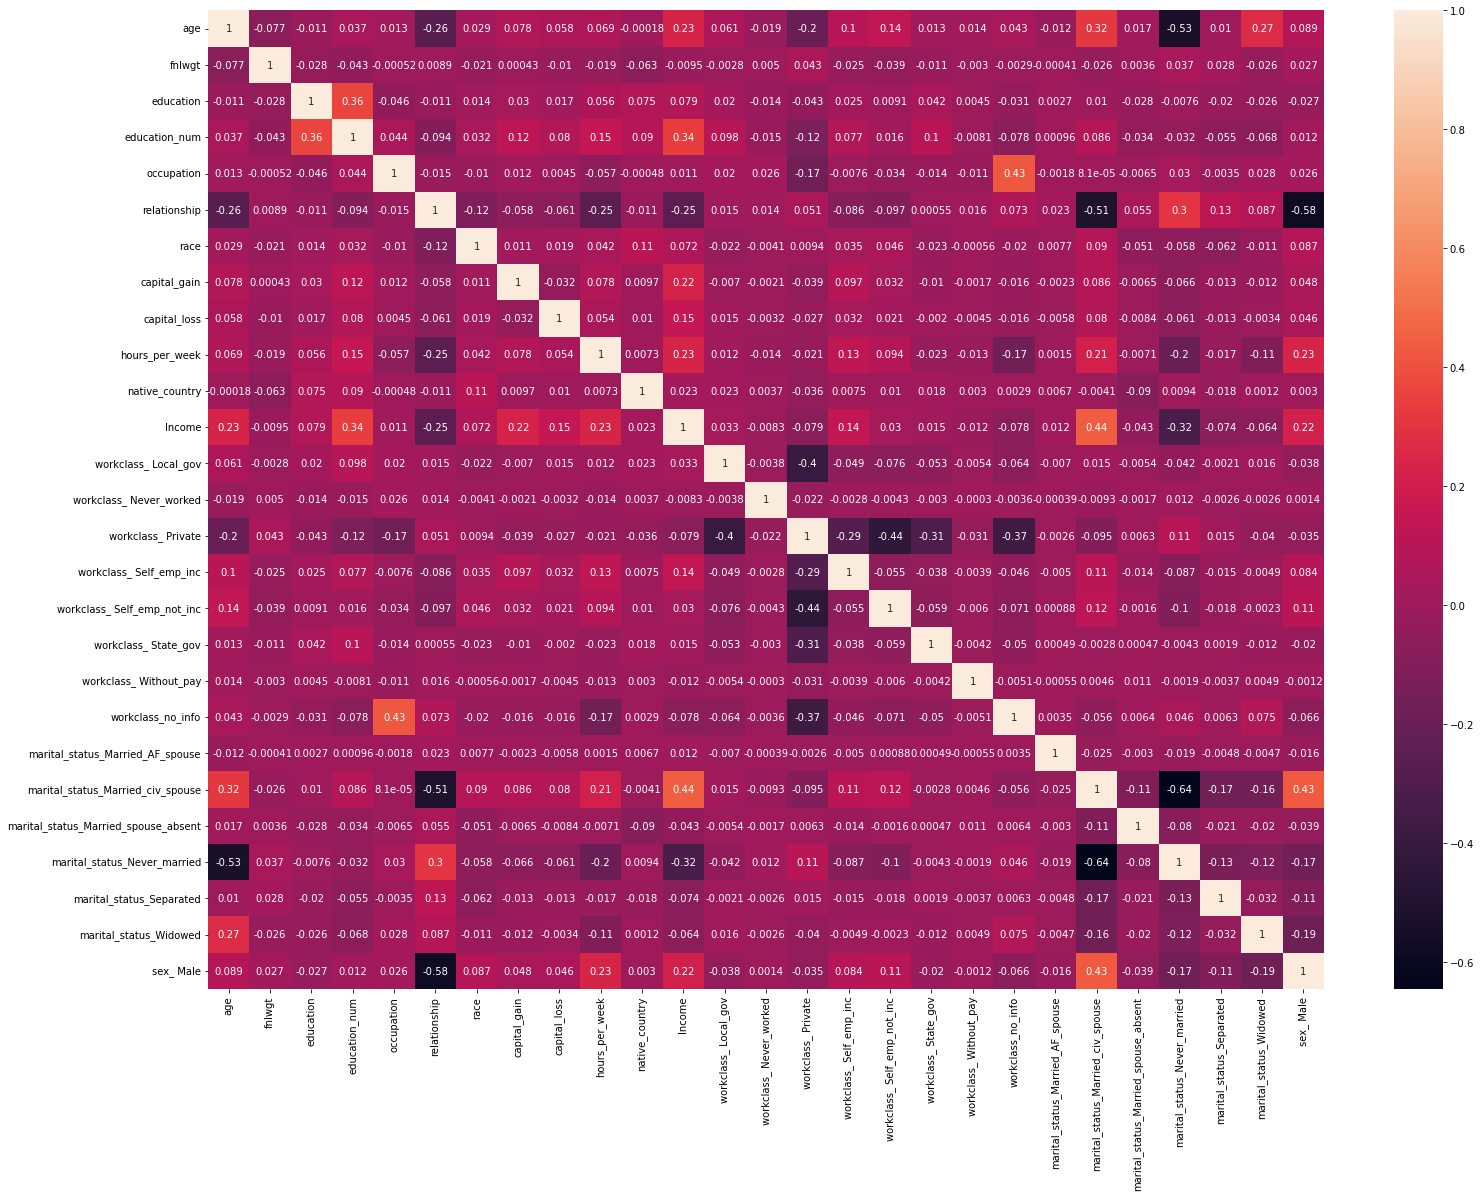

In [54]:
# perform feature selection
plt.figure(figsize=(25,18))
sns.heatmap(adult.corr() , annot=True)

In [55]:
# find the feature importance using Random Forest model
RFC = RandomForestClassifier(n_estimators=200)

In [56]:
RFC.fit(adult.drop('Income',axis=1) , adult.Income )

RandomForestClassifier(n_estimators=200)

In [57]:
RFC.feature_importances_

array([1.45127343e-01, 1.70169858e-01, 3.41628932e-02, 9.06878593e-02,
       6.67269646e-02, 6.76729577e-02, 1.33933132e-02, 1.08192829e-01,
       3.47814643e-02, 8.25199103e-02, 1.78029767e-02, 6.05725171e-03,
       2.53522379e-06, 1.08059995e-02, 6.00177546e-03, 8.28881371e-03,
       4.69324906e-03, 8.36833333e-05, 2.31729680e-03, 4.21245280e-04,
       9.34792622e-02, 9.76227162e-04, 2.06525436e-02, 1.53640241e-03,
       1.55155566e-03, 1.18937896e-02])

In [58]:
feature_score = pd.DataFrame(RFC.feature_importances_ , index= adult.drop('Income',axis=1).columns )
feature_score.columns = ['score']

In [59]:
feature_score.sort_values(by='score', ascending=False)

,score
fnlwgt,0.170170
age,0.145127
capital_gain,0.108193
marital_status_Married_civ_spouse,0.093479
education_num,0.090688
hours_per_week,0.082520
relationship,0.067673
occupation,0.066727
capital_loss,0.034781
education,0.034163


In [60]:
x = adult.drop('Income' , axis=1)
y = adult.Income

In [61]:
mut_info = mutual_info_classif(x,y)

In [62]:
pd.DataFrame(mut_info , index=x.columns).sort_values(0,ascending=False)

,0
relationship,0.113999
marital_status_Married_civ_spouse,0.110164
capital_gain,0.083485
occupation,0.068081
education_num,0.066311
age,0.066236
education,0.066126
marital_status_Never_married,0.064379
hours_per_week,0.038216
capital_loss,0.035785


In [63]:
# pipeline ('impute ', 'labelencoder','minmaxscalar','feature_selection','logistic regression')
# pipe.fit(x,y)
from sklearn.feature_selection import SelectKBest

In [64]:
LR = LogisticRegression(class_weight = {0:3,1:7})
adult.columns

Index(['age', 'fnlwgt', 'education', 'education_num', 'occupation',
       'relationship', 'race', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'Income', 'workclass_ Local_gov',
       'workclass_ Never_worked', 'workclass_ Private',
       'workclass_ Self_emp_inc', 'workclass_ Self_emp_not_inc',
       'workclass_ State_gov', 'workclass_ Without_pay', 'workclass_no_info',
       'marital_status_Married_AF_spouse', 'marital_status_Married_civ_spouse',
       'marital_status_Married_spouse_absent', 'marital_status_Never_married',
       'marital_status_Separated', 'marital_status_Widowed', 'sex_ Male'],
      dtype='object')

In [65]:
x = adult.drop("Income", axis = 1)
y = adult.Income

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,stratify = y,random_state=86252)

In [67]:
from sklearn.model_selection import cross_val_score , StratifiedKFold
cross_val_score(LR, x,y, cv = 20, scoring="accuracy",n_jobs = -1)

array([0.78391651, 0.8009828 , 0.77457002, 0.76412776, 0.79238329,
       0.7960688 , 0.77641278, 0.78869779, 0.78992629, 0.7985258 ,
       0.79791155, 0.78808354, 0.78869779, 0.79914005, 0.78869779,
       0.77334152, 0.79238329, 0.78931204, 0.80036855, 0.79238329])

In [68]:
LR.fit(x_train,y_train)

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 3, 1: 7})

In [69]:
LR.predict(x_test)

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [70]:
accuracy_score(y_test, LR.predict(x_test))

0.7944111776447106

In [71]:
confusion_matrix(y_test, LR.predict(x_test))

array([[4123,  822],
       [ 517, 1051]], dtype=int64)

In [72]:
data = LR.predict_proba(x_test)
data

array([[0.90340481, 0.09659519],
       [0.11351466, 0.88648534],
       [0.32743066, 0.67256934],
       ...,
       [0.24996277, 0.75003723],
       [0.94609283, 0.05390717],
       [0.6733549 , 0.3266451 ]])

In [73]:
np.where(data>0.7,1,0)

array([[1, 0],
       [0, 1],
       [0, 0],
       ...,
       [0, 1],
       [1, 0],
       [0, 0]])

In [74]:
output = []
for i in range(len(data)):
    if data[i][0] >0.5:
        output.append(0)
    else:
        output.append(1)

In [75]:
confusion_matrix(y_test,output)

array([[4123,  822],
       [ 517, 1051]], dtype=int64)

In [76]:
# random forest
RFC = RandomForestClassifier(n_estimators=200, max_depth = 8)
RFC.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, n_estimators=200)

In [77]:
RFC.predict(x_test)

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [78]:
accuracy_score(y_test, RFC.predict(x_test))

0.8567480423767849

In [79]:
confusion_matrix(y_test, RFC.predict(x_test))

array([[4719,  226],
       [ 707,  861]], dtype=int64)

In [80]:
param = {'n_estimators' : [100,200,400,500,700,1000],
        'max_depth' : [5,8,10,12,15,20],
        'min_samples_split' : [2,3,4,5],
         'min_samples_leaf' : [1,2,3,4,5,6],
        'criterion' : ['gini' , 'entropy'],
        'class_weight' : ['balanced' , {0:3,1:7},{0:2,1:8}]
}
    


In [81]:
# from sklearn.ensemble import 
from sklearn.model_selection import RandomizedSearchCV
rnd_cv= RandomizedSearchCV(RFC, param, cv =10, scoring ="accuracy", n_iter = 5, n_jobs =-1)

In [82]:
rnd_cv.fit(x,y)

RandomizedSearchCV(cv=10,
                   estimator=RandomForestClassifier(max_depth=8,
                                                    n_estimators=200),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced',
                                                         {0: 3, 1: 7},
                                                         {0: 2, 1: 8}],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 8, 10, 12, 15, 20],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 400, 500,
                                                         700, 1000]},
                   scoring='accuracy')

In [83]:
rnd_cv.best_score_

0.8532907387528205

In [84]:
rnd_cv.best_params_

{'n_estimators': 100,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'criterion': 'gini',
 'class_weight': {0: 3, 1: 7}}

In [85]:
rnd_cv.best_estimator_

RandomForestClassifier(class_weight={0: 3, 1: 7}, max_depth=20,
                       min_samples_split=3)

In [86]:
confusion_matrix(y_test,rnd_cv.predict(x_test))

array([[4588,  357],
       [  74, 1494]], dtype=int64)

In [87]:
pred = rnd_cv.predict(x_test)

In [89]:
f1_score(y_test ,y_pred = np.array(pred))

0.8739397484644634

In [90]:
# randomized search CV to get best modle
clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier()
clf_3 = RandomForestClassifier()
clf_4 = AdaBoostClassifier()

In [91]:
from sklearn.pipeline import Pipeline

In [93]:
Pipe = Pipeline([("classifier", clf_1)])

In [97]:
# for logistic regression
param1 = {}
param1["classifier"] = [clf_1]
param1["classifier__penalty"] = ["11","12"]
param1["classifier__solver"] = ['lbfgs',"liblinear"]
param1["classifier_class_weigth"]= [{0:3,1:7},{0:1,1:9},{0:2,1:8}]
param1

{'classifier': [LogisticRegression()],
 'classifier__penalty': ['11', '12'],
 'classifier__solver': ['lbfgs', 'liblinear'],
 'classifier_class_weigth': [{0: 3, 1: 7}, {0: 9}, {0: 8}]}

In [99]:
# for decision tree
param2 = {}
param2["classifier"]= [clf_2]
param2["classifier__max_depth"]= [3,5,7,8,10,12]
param2["classifier__min_sample_split"] = [2,4,5,7,8,10]
param2["classifier__criterion"] = ["gini","entropy"]
param2["classifier__class_weight"]= [{0:3,1:7},{0:1,1:9},{0.2,0.8}]

In [113]:
# for random forest
param3 = {}
param3["classifier"]=[clf_3]
param3["classifier__max_depth"] =[3,5,7,8,10,12]
param3["classifier__n_estimators"] = [100,200,300,400,500,700]
param3["classifier__min_samples_split"] = [2,4,5,7,8,10]
param3["classifier__criterion"] = ["gini","entropy"]
param3["classifier__class_weight"] = [{0:3,0:7},{0:1,0:9},{0:2,0:8}]

In [114]:
# for Adaboost
param4 = {}
param4["classifier"]=[clf_4]
param4["classifier__n_estimators"] = [50,100,150,200,300,350,400]
param4["classifier__learning_rate"] = [0.5,0.8,1,1.5,2,3]

In [115]:
param = [param1,param2,param3,param4]


In [116]:
rand_cv = RandomizedSearchCV(Pipe,param,cv=10,scoring ="accuracy",n_iter=5, n_jobs = -1, return_train_score= True, )

In [117]:
rand_cv.fit(x,y)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('classifier',
                                              LogisticRegression())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'classifier': [LogisticRegression()],
                                         'classifier__penalty': ['11', '12'],
                                         'classifier__solver': ['lbfgs',
                                                                'liblinear'],
                                         'classifier_class_weigth': [{0: 3,
                                                                      1: 7},
                                                                     {0: 9},
                                                                     {0: 8}]},
                                        {'classifier': [DecisionTreeClassifier()],
                                         'classifier__cl...
                                         'c

In [120]:
rand_cv.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight={0: 7}, max_depth=12,
                                        min_samples_split=8))])

In [121]:
rand_cv.best_score_

0.8245447246867265

In [122]:
rand_cv.best_params_

{'classifier__n_estimators': 100,
 'classifier__min_samples_split': 8,
 'classifier__max_depth': 12,
 'classifier__criterion': 'gini',
 'classifier__class_weight': {0: 7},
 'classifier': RandomForestClassifier(class_weight={0: 7}, max_depth=12, min_samples_split=8)}

In [123]:
rand_cv.scorer_

make_scorer(accuracy_score)

In [127]:
adult

,age,fnlwgt,education,education_num,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,...,workclass_ State_gov,workclass_ Without_pay,workclass_no_info,marital_status_Married_AF_spouse,marital_status_Married_civ_spouse,marital_status_Married_spouse_absent,marital_status_Never_married,marital_status_Separated,marital_status_Widowed,sex_ Male
0,39,4.430190,9.0,13,0.0,1,4,2.174022,0,40,...,1,0,0,0,0,0,1,0,0,1
1,50,4.823760,9.0,13,3.0,0,4,0.000000,0,13,...,0,0,0,0,1,0,0,0,0,1
2,38,13.811345,11.0,9,5.0,1,4,0.000000,0,40,...,0,0,0,0,0,0,0,0,0,1
3,53,15.106831,1.0,7,5.0,0,2,0.000000,0,40,...,0,0,0,0,1,0,0,0,0,1
4,28,22.148843,9.0,13,9.0,5,2,0.000000,0,40,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,16.640429,7.0,12,12.0,5,4,0.000000,0,38,...,0,0,0,0,1,0,0,0,0,0
32557,40,9.650032,11.0,9,6.0,0,4,0.000000,0,40,...,0,0,0,0,1,0,0,0,0,1
32558,58,9.482688,11.0,9,0.0,4,4,0.000000,0,40,...,0,0,0,0,0,0,0,0,1,0
32559,22,12.849934,11.0,9,0.0,3,4,0.000000,0,20,...,0,0,0,0,0,0,1,0,0,1


In [128]:
len([45,6.9,6,7,5,0,4,3.5,1,67,10,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1])

26

In [130]:
rand_cv.predict([[45,6.9,6,7,5,0,4,3.5,1,67,10,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1]])

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [132]:
# save model
import pickle

In [133]:
with open("proj2.pkl","wb+") as f:
    pickle.dump(rand_cv,f)

In [134]:
pd.read_pickle("proj2.pkl")

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('classifier',
                                              LogisticRegression())]),
                   n_iter=5, n_jobs=-1,
                   param_distributions=[{'classifier': [LogisticRegression()],
                                         'classifier__penalty': ['11', '12'],
                                         'classifier__solver': ['lbfgs',
                                                                'liblinear'],
                                         'classifier_class_weigth': [{0: 3,
                                                                      1: 7},
                                                                     {0: 9},
                                                                     {0: 8}]},
                                        {'classifier': [DecisionTreeClassifier()],
                                         'classifier__cl...
                                         'c

In [136]:
with open("proj2.pkl","rb") as f:
    model = pickle.load(f)

In [137]:
model.best_estimator_

Pipeline(steps=[('classifier',
                 RandomForestClassifier(class_weight={0: 7}, max_depth=12,
                                        min_samples_split=8))])

In [139]:
model.predict([[45,6.9,6,7,5,0,4,3.5,1,67,10,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1]])

C:\Users\Vijaykumar Gajbhiye\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)